<a href="https://colab.research.google.com/github/NUKALAMOHANSAIGUPTA/AIML_LAB/blob/main/2303A51502_b25_labexam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

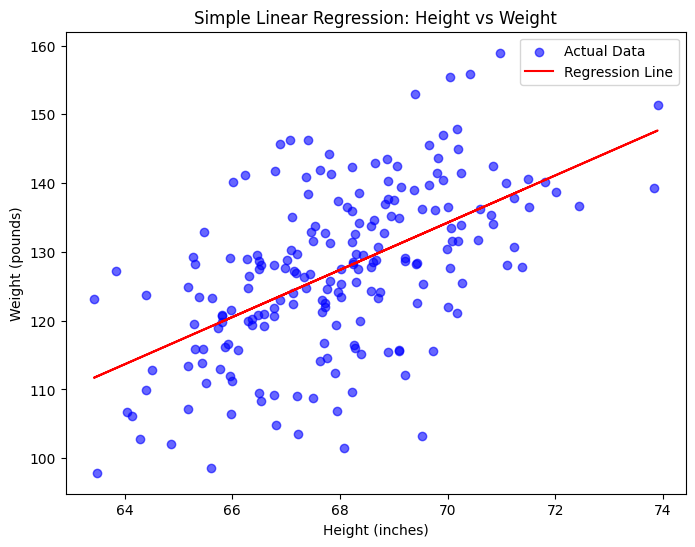

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load and clean the dataset
data = pd.read_csv('/content/hw_200.csv')
data.columns = data.columns.str.replace('"', '').str.strip()
data = data.drop(columns=["Index"])
data.columns = ["Height", "Weight"]

# Prepare data
X = data["Height"].values.reshape(-1, 1)
y = data["Weight"].values

# Fit the model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", alpha=0.6, label="Actual Data")
plt.plot(X, y_pred, color="red", label="Regression Line")
plt.xlabel("Height (inches)")
plt.ylabel("Weight (pounds)")
plt.title("Simple Linear Regression: Height vs Weight")
plt.legend()
plt.show()


In [6]:
from sklearn.metrics import r2_score

# Calculate R-squared
r_squared = r2_score(y, y_pred)

# Print R-squared value
print(f"R-squared value: {r_squared:.3f}")


R-squared value: 0.310


In [3]:
# Simulate additional variables (e.g., Age, Gender) for demonstration
import numpy as np
data["Age"] = np.random.randint(20, 50, size=len(data))
data["Gender"] = np.random.choice([0, 1], size=len(data))  # 0: Female, 1: Male

# Prepare data
X_multi = data[["Height", "Age", "Gender"]]
y = data["Weight"]

# Fit the multiple regression model
multi_model = LinearRegression()
multi_model.fit(X_multi, y)
y_multi_pred = multi_model.predict(X_multi)

# Print coefficients
print("Coefficients:", multi_model.coef_)
print("Intercept:", multi_model.intercept_)


Coefficients: [3.42554337 0.0059493  0.5422941 ]
Intercept: -105.98201896171881


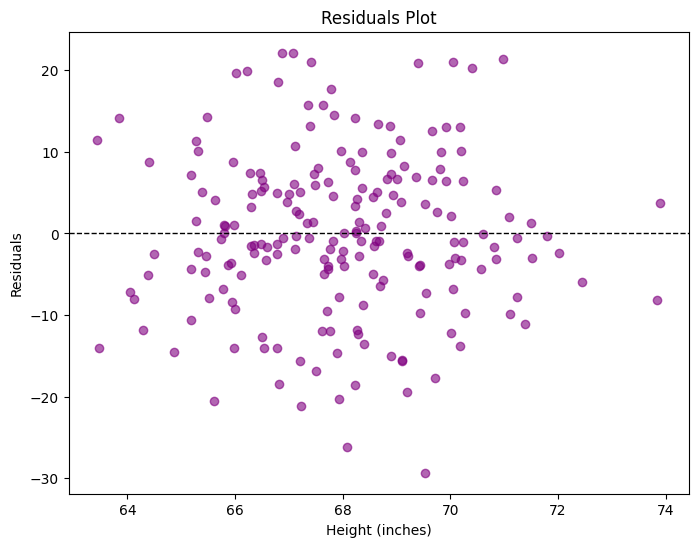

In [4]:
# Calculate residuals
residuals = y - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(X, residuals, color="purple", alpha=0.6)
plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
plt.xlabel("Height (inches)")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# Without scaling
model_no_scaling = LinearRegression()
model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_no_scaling.predict(X_test)
mse_no_scaling = mean_squared_error(y_test, y_pred_no_scaling)

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaling = LinearRegression()
model_scaling.fit(X_train_scaled, y_train)
y_pred_scaling = model_scaling.predict(X_test)
mse_scaling = mean_squared_error(y_test, y_pred_scaling)

print(f"Mean Squared Error (No Scaling): {mse_no_scaling:.3f}")
print(f"Mean Squared Error (With Scaling): {mse_scaling:.3f}")


Mean Squared Error (No Scaling): 135.569
Mean Squared Error (With Scaling): 221030.792


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
